# Task
Implement Support Vector Machine (SVM) for classification with hyperparameter tuning



## Upload file

### Subtask:
Create a cell for uploading the csv files.


**Reasoning**:
Create a code cell to handle the file upload process using google.colab.files.upload and print a message to the user.



Best Parameters: {'svm__C': 0.1}
Accuracy: 0.671875

Confusion Matrix:
 [[849 404]
 [121 226]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.76      1253
           1       0.36      0.65      0.46       347

    accuracy                           0.67      1600
   macro avg       0.62      0.66      0.61      1600
weighted avg       0.76      0.67      0.70      1600



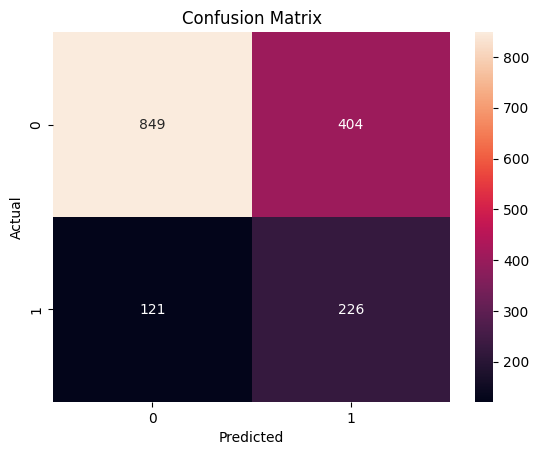

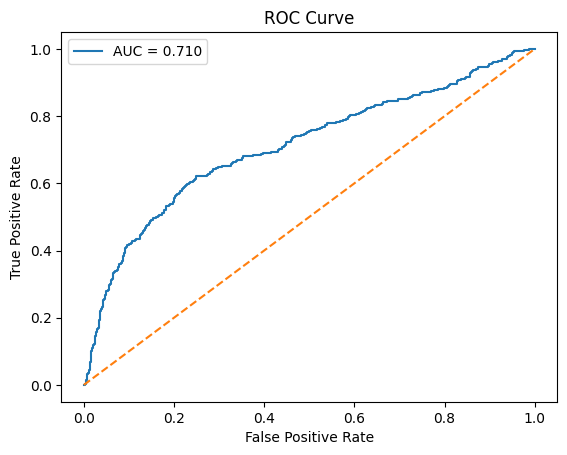

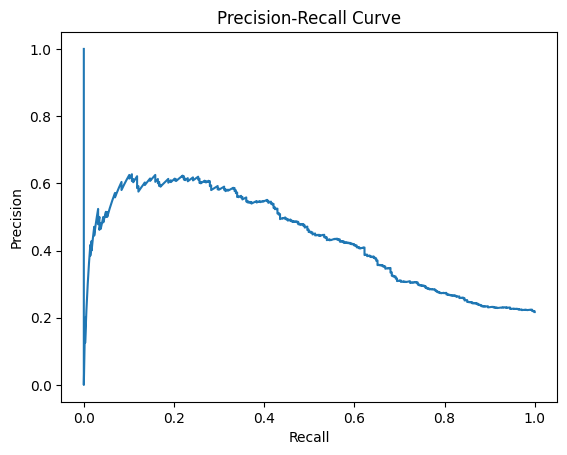

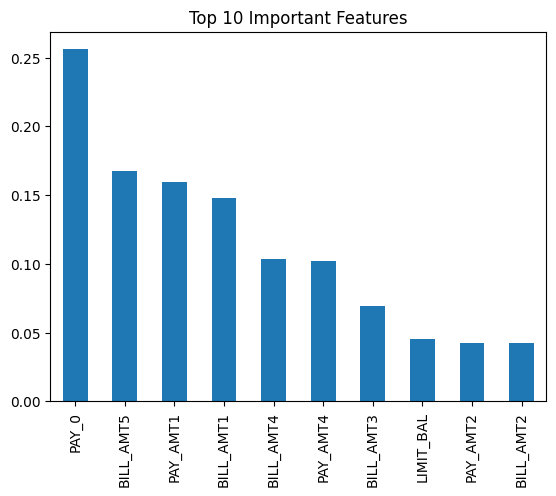

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_curve,
    auc,
    precision_recall_curve
)

# ----------------------------
# 1️⃣ Load dataset
# ----------------------------
df = pd.read_csv("UCI_Credit_Card.csv")

# Reduce size for faster execution (optional)
df = df.sample(8000, random_state=42)

if "ID" in df.columns:
    df = df.drop("ID", axis=1)

X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

# ----------------------------
# 2️⃣ Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 3️⃣ Pipeline
# ----------------------------
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(class_weight='balanced', max_iter=5000))
])

param_grid = {
    'svm__C': [0.1, 1, 10]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# ----------------------------
# 4️⃣ Predictions
# ----------------------------
y_pred = grid.predict(X_test)
y_scores = grid.decision_function(X_test)

# ----------------------------
# 5️⃣ Metrics
# ----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ============================
# 📊 VISUAL OUTPUTS
# ============================

# 1️⃣ Confusion Matrix Heatmap
plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 3️⃣ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# 4️⃣ Feature Importance (Coefficient Magnitude)
best_model = grid.best_estimator_.named_steps['svm']
coefficients = np.abs(best_model.coef_[0])

feature_importance = pd.Series(coefficients, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure()
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()